In [1]:
from invisible_cities.database.load_db import DataSiPM

from csth.images.imageDataFrame        import imageDataFrame

import csth.utils.cepeak_pmaps  as cpkpmap
import csth.utils.pmaps         as pmapdf
import csth.utils.cepeak        as cpk
import csth.images.voxelization as vx
import csth.images.blob         as bl

from csth.images.IMAGE import IMAGE

import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt
import matplotlib.patches  as patches
import matplotlib.gridspec as gridspec

from scipy                   import optimize
from scipy.integrate         import quad

In [2]:
# Plotting style
figure_size  = 9, 5
#default_cmap = "viridis"

plt.rcParams["figure.figsize"]  = figure_size
plt.rcParams["axes.facecolor"]  = 'ghostwhite'
plt.rcParams["grid.color"    ]  = 'lightgrey'
plt.rcParams["axes.formatter.limits"] = -4, 4
plt.rcParams["font.family"]='serif'

#plt.style.use(plt.style.available[10])

#set number of bins
nbins = 100

In [3]:
def cepeak(run_number, input_filename, correction_filename, evt, pk, q0min):
    pmaps, runinfo        = cpkpmap.data(input_filename)
    
    calibrate, xpos, ypos = cpkpmap.tools(correction_filename, run_number)
    
    pmap = pmapdf.get_eventpeak(pmaps, evt, pk)
    
    epk   = cpkpmap.epeak(pmap, xpos, ypos, q0min)
    if (epk is None): 
        print('No epeak!!')

    cepk  = cpk.cepeak(epk, calibrate)

    return epk, cepk

## Import data

In [4]:
run = 6482
data = pd.HDFStore(f'../DATA/cepks_{run}_0000_11999_6q0min.h5')['/esum']

#fiducial
#data = data[(50<data.z)&(data.z<500)&(data.x**2+data.y**2+data.z**2<180**2)]

#photopeak region for run
a, b = 4.2e5, 4.35e5 #Tlde
#a, b = 6.9e5, 7.2e5 #Tl
thds = data[(a<data['e'])&(data['e']<b)]

evts, pks, locs = thds['event'].values, thds['peak'].values, thds['location'].values

## Event selection

In [25]:
typo = 'Tlds'
i=int(len(evts)*np.random.random())
print(i)
# i=586
evt, pk, loc = evts[i], pks[i], locs[i]
loc = '{:04}'.format(loc)

575


In [26]:
q0=6

correction_filename = f'/home/gonzalo/Documentos/NEXT/DATA/maps/kr_corrections_run{run}.h5'
#input_filename  = f'/home/gonzalo/Documentos/NEXT/CsThNB/GDL/selected_pmaps/{run}/pmaps_{loc}_{run}_{typo}.h5'
input_filename      = f'/home/gonzalo/Documentos/NEXT/DATA/{run}/pmaps_{loc}_{run}_trigger2_v0.9.9_20181011_krth1300.h5'


epk, cepk = cepeak(run, input_filename, correction_filename, evt, pk, q0min=q0)
xij, yij, zij, eij = cepk.xij, cepk.yij, cepk.zij, cepk.eij

processing  /home/gonzalo/Documentos/NEXT/DATA/6482/pmaps_2588_6482_trigger2_v0.9.9_20181011_krth1300.h5


## Image

In [27]:
imagedf = pd.DataFrame(columns=['X', 'Y', 'Z', 'E'])
imagedf['X'], imagedf['Y'], imagedf['Z'], imagedf['E'] = xij, yij, zij, eij
datasipm = DataSiPM('new', run)

<IPython.core.display.Javascript object>


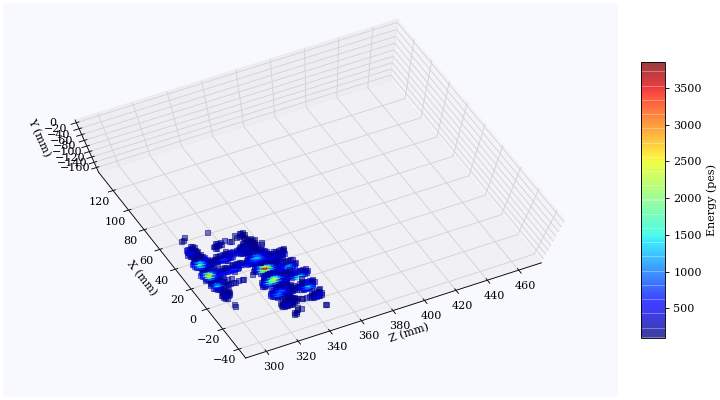

In [28]:
im = IMAGE(imagedf, datasipm, run, evt, typo)
im.plot3d()
im.fig.show();

<IPython.core.display.Javascript object>


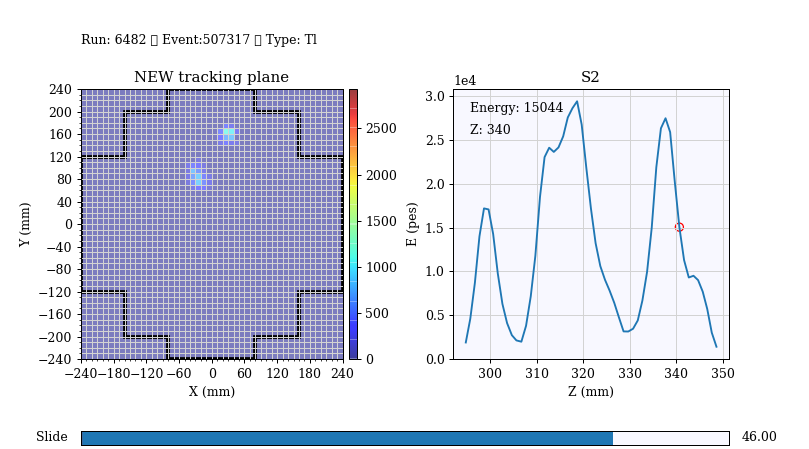

In [12]:
im = IMAGE(imagedf, datasipm, run, evt, typo)
im.Movie_Slider()
im.fig.show()

In [14]:
im = IMAGE(imagedf, datasipm, run, evt, typo)
im.Video(q0=q0)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/matplotlib/figure.py:2310: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  warnings.warn("Calling figure.constrained_layout, but figure not "


In [46]:
im = IMAGE(imagedf, datasipm, run, evt, typo)
im.Video3d(q0=q0)

/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  warnings.warn('constrained_layout not applied.  At least '


In [9]:
q0s = [2, 4, 6, 8, 10, 12]

for q0 in q0s:
    
    epk, cepk = cepeak(run, input_filename, correction_filename, evt, pk, q0min=q0)
    xij, yij, zij, eij = cepk.xij, cepk.yij, cepk.zij, cepk.eij
    
    imagedf = pd.DataFrame(columns=['X', 'Y', 'Z', 'E'])
    imagedf['X'], imagedf['Y'], imagedf['Z'], imagedf['E'] = xij, yij, zij, eij

    im = IMAGE(imagedf, datasipm, run, evt, typo)
    im.Video3d(q0=q0)

processing  /home/gonzalo/Documentos/NEXT/DATA/6482/pmaps_2639_6482_trigger2_v0.9.9_20181011_krth1300.h5


/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  warnings.warn('constrained_layout not applied.  At least '


processing  /home/gonzalo/Documentos/NEXT/DATA/6482/pmaps_2639_6482_trigger2_v0.9.9_20181011_krth1300.h5


/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  warnings.warn('constrained_layout not applied.  At least '


processing  /home/gonzalo/Documentos/NEXT/DATA/6482/pmaps_2639_6482_trigger2_v0.9.9_20181011_krth1300.h5


/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  warnings.warn('constrained_layout not applied.  At least '


processing  /home/gonzalo/Documentos/NEXT/DATA/6482/pmaps_2639_6482_trigger2_v0.9.9_20181011_krth1300.h5


/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  warnings.warn('constrained_layout not applied.  At least '


processing  /home/gonzalo/Documentos/NEXT/DATA/6482/pmaps_2639_6482_trigger2_v0.9.9_20181011_krth1300.h5


/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  warnings.warn('constrained_layout not applied.  At least '


processing  /home/gonzalo/Documentos/NEXT/DATA/6482/pmaps_2639_6482_trigger2_v0.9.9_20181011_krth1300.h5


/home/gonzalo/anaconda3/envs/IC-3.7-2018-10-20/lib/python3.7/site-packages/matplotlib/_constrained_layout.py:226: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  warnings.warn('constrained_layout not applied.  At least '


<IPython.core.display.Javascript object>


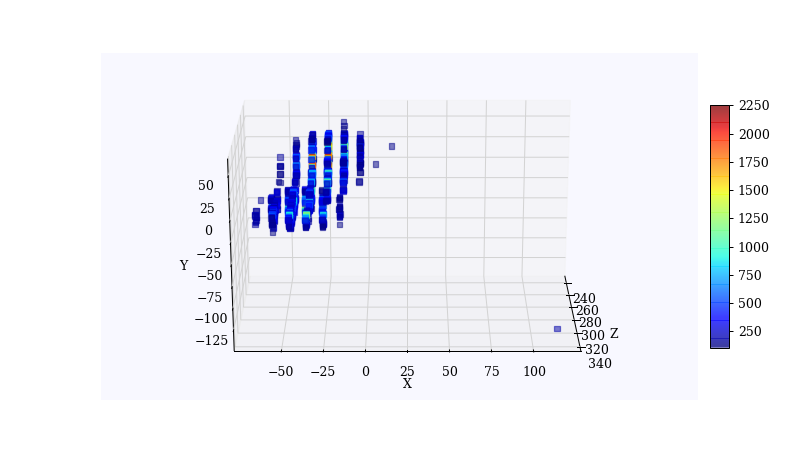

In [12]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')

im=imagedf

th=0
imdf = im[im.E > th]
X, Y, Z, E = imdf['X'], imdf['Y'], imdf['Z'], imdf['E']
        #X, Y, Z, E = self.im['X'], self.im['Y'], self.im['Z'], self.im['E']

im3d = ax.scatter(Z, X, Y, zdir='z', s=20, c=E, depthshade=True, marker='s', alpha=0.5, cmap='jet');
ax.set_xlabel('Z');
ax.set_ylabel('X');
ax.set_zlabel('Y');

ax.view_init(20, 0)

cbar    = fig.colorbar(im3d, ax=ax, fraction=0.03, shrink=0.7);
fig.show()

In [28]:
def update3d(frame_number):
    
    ax.view_init(20, frame_number)

In [30]:
from matplotlib.animation    import FuncAnimation
#video creation
inter  = 3e2
frames = range(0, 360)
anim = FuncAnimation(fig, update3d, interval = inter, frames = frames, repeat = False)

In [33]:
fig.show()

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)